<a href="https://colab.research.google.com/github/MilKim0818/TIL/blob/main/EDA/A_B_%ED%85%8C%EC%8A%A4%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> 휴넷 [Big Data 한입] 파이썬을 활용한 경영데이터 분석 강의 실습 파일입니다.

# A/B 테스트란?
* 실험 참여자를 임의의 두 집단으로 나누고, 하나의 집단에게는 대안 A를 다른 집단에게는 대안 B를 체험하게 한다.
* 두 집단 중 어떤 집단이 더 높은 성과를 보이는지 측정하여 대안별 성과를 파악하는 것

## 대안별 성과
* 목표에 따라 클릭률, 재방문율, 구매전환율 등이 될 수 있음.

## 활용 케이스
* 웹사이트 또는 모바일 앱의 디자인, 인터페이스, 상품 배치 등을 개선하기 위해서 사용

# 1. t-test
* 두 집단의 매장 체류 시간, 구매 금액 등 숫자 값의 평균을 비교하는 방법

## 실습
* 5월 고객, 6월 고객 평균 연령 비교하기

In [ ]:
!pip install pingouin

In [29]:
import scipy
import pingouin as pg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [11]:
# 데이터셋 불러오기
path = "/content/drive/MyDrive/datasets/down_practice/"
customer5 = pd.read_csv(f'{path}customer5.csv')
customer6 = pd.read_csv(f'{path}customer6.csv')
display(customer5), display(customer6)

,regcust,age,sex,type,regyear,regmon
0,arllzxpd,20,M,Premium,2016,5
1,ckbxzluh,31,M,Premium,2016,5
2,mzpabcxt,28,M,Premium,2016,5
3,yxpsucwv,20,M,Basic,2016,5
4,xqatbtna,30,M,Premium,2016,5
...,...,...,...,...,...,...
1995,ozoyjaqp,33,M,Basic,2016,5
1996,yturxcae,32,M,Basic,2016,5
1997,aqvmkcal,23,F,Premium,2016,5
1998,ufcfeont,40,F,Basic,2016,5


,regcust,age,sex,type,regyear,regmon
0,gncowqlx,27,F,Basic,2016,6
1,walcuucd,29,F,Basic,2016,6
2,wwwedfyo,28,F,Basic,2016,6
3,ztexaqff,17,M,Basic,2016,6
4,uwqfxptk,21,M,Premium,2016,6
...,...,...,...,...,...,...
2495,dblccxfn,20,M,Basic,2016,6
2496,phjksvgs,11,F,Basic,2016,6
2497,sivijrhz,26,M,Premium,2016,6
2498,awmqbkdg,28,M,Basic,2016,6


(None, None)

In [21]:
df_customer5to6 = pd.concat([customer5, customer6], ignore_index=True)
df_customer5to6

,regcust,age,sex,type,regyear,regmon
0,arllzxpd,20,M,Premium,2016,5
1,ckbxzluh,31,M,Premium,2016,5
2,mzpabcxt,28,M,Premium,2016,5
3,yxpsucwv,20,M,Basic,2016,5
4,xqatbtna,30,M,Premium,2016,5
...,...,...,...,...,...,...
4495,dblccxfn,20,M,Basic,2016,6
4496,phjksvgs,11,F,Basic,2016,6
4497,sivijrhz,26,M,Premium,2016,6
4498,awmqbkdg,28,M,Basic,2016,6


In [37]:
df_customer5to6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   regcust  4500 non-null   object
 1   age      4500 non-null   int64 
 2   sex      4453 non-null   object
 3   type     4461 non-null   object
 4   regyear  4500 non-null   int64 
 5   regmon   4500 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 211.1+ KB


In [40]:
df_customer5to6['regmon'] = df_customer5to6['regmon'].astype('str')
df_customer5to6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   regcust  4500 non-null   object
 1   age      4500 non-null   int64 
 2   sex      4453 non-null   object
 3   type     4461 non-null   object
 4   regyear  4500 non-null   int64 
 5   regmon   4500 non-null   object
dtypes: int64(2), object(4)
memory usage: 211.1+ KB


In [12]:
cstmr5_age = customer5['age']
cstmr6_age = customer6['age']

In [19]:
# 평균 확인하기
# 방법1 (넘파이 활용)
print(np.mean(cstmr5_age)), print(np.mean(cstmr6_age))

# 방법2 (판다스 기술통계 활용)
cstmr5_age.describe(), cstmr6_age.describe()

24.5705
25.0844


(count    2000.000000
 mean       24.570500
 std         8.749246
 min        10.000000
 25%        17.000000
 50%        24.000000
 75%        32.000000
 max        40.000000
 Name: age, dtype: float64,
 count    2500.000000
 mean       25.084400
 std         9.006271
 min        10.000000
 25%        17.000000
 50%        25.000000
 75%        33.000000
 max        40.000000
 Name: age, dtype: float64)

<Axes: xlabel='age', ylabel='regmon'>

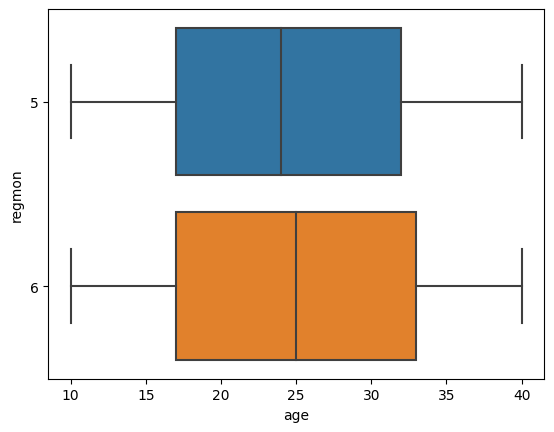

In [41]:
sns.boxplot(data=df_customer5to6, x='age', y='regmon' )

<Axes: xlabel='age', ylabel='Density'>

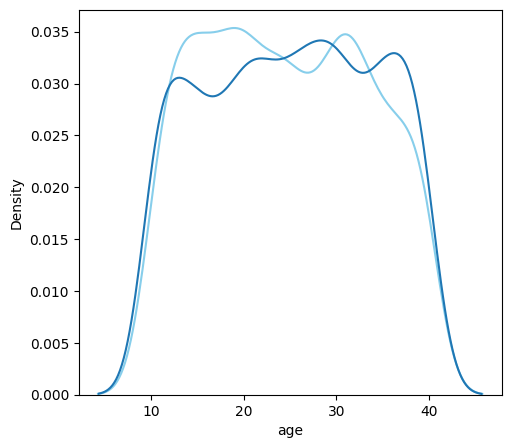

In [44]:
plt.figure(figsize=(12, 5))
plt.subplot(121)
sns.kdeplot(data=customer5, x='age', color='skyblue')
plt.subplot(121)
sns.kdeplot(data=customer6, x='age')

<Axes: ylabel='Density'>

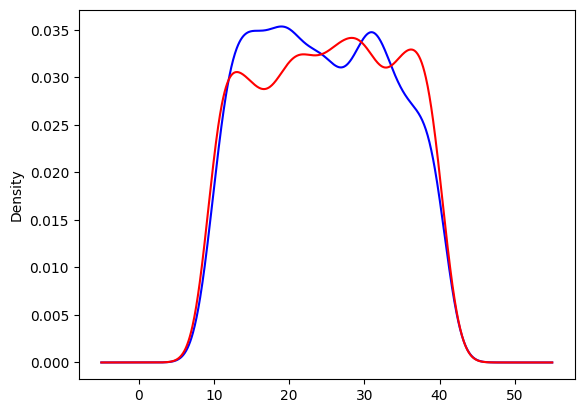

In [24]:
customer5.age.plot(kind='kde', color='blue')
customer6.age.plot(kind='kde', color='red')

In [13]:
pg.ttest(cstmr5_age, cstmr6_age)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.932449,4333.556919,two-sided,0.053369,"[-1.04, 0.01]",0.057787,0.217,0.486437


In [14]:
# 귀무가설을 기각할 수 있는지 p-value와 유의수준 비교하기
# '평균의 차이가 없다'라는 귀무가설을 기각할 수 없으므로 유보하기.
p = 0.053369
유의수준 = 0.05
p < 유의수준

False

In [16]:
(-1.04 + 0.01) / 2

-0.515